### Biblitecas

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import tokenize
import nltk
import seaborn as sns
from nltk import word_tokenize
from string import punctuation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
import re
import time
from datasketch import MinHash, MinHashLSHForest
from string import punctuation

# Data Cleaning

### Pegando os dados da base scopus

In [2]:
dados_scopus1 = pd.read_csv("C:/Users/thayanne.silva/Documents/scopus2016-1.csv")
dados_scopus2 = pd.read_csv("C:/Users/thayanne.silva/Documents/scopus2016-2.csv")
dados_scopus3 = pd.read_csv("C:/Users/thayanne.silva/Documents/scopus2017.csv")

### Pegando os dados da base ieee

In [3]:
dados_ieee1 = pd.read_csv("C:/Users/thayanne.silva/Documents/ieee2016-1.csv")
dados_ieee2 = pd.read_csv("C:/Users/thayanne.silva/Documents/ieee2016-2.csv")
dados_ieee3 = pd.read_csv("C:/Users/thayanne.silva/Documents/ieee2017-1.csv")

### Verificando as colunas da base scopus e selecionando as colunas relevantes

In [4]:
for col in dados_scopus1.columns:
    print(col) 

Authors
Author(s) ID
Title
Year
Source title
Volume
Issue
Art. No.
Page start
Page end
Page count
Cited by
DOI
Link
Affiliations
Authors with affiliations
Abstract
Author Keywords
Index Keywords
Correspondence Address
Editors
Publisher
ISSN
ISBN
CODEN
PubMed ID
Language of Original Document
Abbreviated Source Title
Document Type
Publication Stage
Access Type
Source
EID


In [5]:
df1 = dados_scopus1[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df2 = dados_scopus2[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df3 = dados_scopus3[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]

### Verificando as colunas da base ieee, renomeando as colunas e selecionando as colunas relevantes

In [6]:
for col in dados_ieee1.columns:
    print(col) 

Document Title
Authors
Author Affiliations
Publication Title
Date Added To Xplore
Publication Year
Volume
Issue
Start Page
End Page
Abstract
ISSN
ISBNs
DOI
Funding Information
PDF Link
Author Keywords
IEEE Terms
INSPEC Controlled Terms
INSPEC Non-Controlled Terms
Mesh_Terms
Article Citation Count
Patent Citation Count
Reference Count
License
Online Date
Issue Date
Meeting Date
Publisher
Document Identifier


In [7]:
dados_ieee1 = dados_ieee1.rename(columns={'Document Title': 'Title'})
dados_ieee1 = dados_ieee1.rename(columns={'Publication Year': 'Year'})
dados_ieee1 = dados_ieee1.rename(columns={'PDF Link': 'Link'})
dados_ieee1 = dados_ieee1.rename(columns={'Author Affiliations': 'Authors with affiliations'})
dados_ieee1 = dados_ieee1.rename(columns={'Author Affiliations': 'Authors with affiliations'})

dados_ieee2 = dados_ieee2.rename(columns={'Document Title': 'Title'})
dados_ieee2 = dados_ieee2.rename(columns={'Publication Year': 'Year'})
dados_ieee2 = dados_ieee2.rename(columns={'PDF Link': 'Link'})
dados_ieee2 = dados_ieee2.rename(columns={'Author Affiliations': 'Authors with affiliations'})
dados_ieee2 = dados_ieee2.rename(columns={'Author Affiliations': 'Authors with affiliations'})

dados_ieee3 = dados_ieee3.rename(columns={'Document Title': 'Title'})
dados_ieee3 = dados_ieee3.rename(columns={'Publication Year': 'Year'})
dados_ieee3 = dados_ieee3.rename(columns={'PDF Link': 'Link'})
dados_ieee3 = dados_ieee3.rename(columns={'Author Affiliations': 'Authors with affiliations'})
dados_ieee3 = dados_ieee3.rename(columns={'Author Affiliations': 'Authors with affiliations'})

In [8]:
df4 = dados_ieee1[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df5 = dados_ieee2[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df6 = dados_ieee3[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]

In [9]:
df4

,Authors,Title,Year,DOI,Link,Authors with affiliations,Abstract,Author Keywords,Publisher
0,S. Mathew; J. T. Abraham,Application of Data Mining in Higher Secondary...,2016,10.1109/SAPIENCE.2016.7684139,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"Bharathiyar University, Coimbatore, India; Com...","In this paper, we discuss Data Mining and its ...",Data Classification;Data Mining;Examination Re...,IEEE
1,Anoopkumar M; A. M. J. M. Z. Rahman,A Review on Data Mining techniques and factors...,2016,10.1109/SAPIENCE.2016.7684113,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"Bharathiar University - Coimbatore, South Indi...",Educational Data Mining (EDM) is an interdisci...,Data Mining (DM);Educational data mining (EDM)...,IEEE
2,T. Devasia; Vinushree T P; V. Hegde,Prediction of students performance using Educa...,2016,10.1109/SAPIENCE.2016.7684167,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"Department of Computer Science, Amrita Vishwa ...",Data mining plays an important role in the bus...,Educational Data Mining;Predicting student per...,IEEE
3,P. Sun; L. Xu; H. Fan,"RHadoop-based fuzzy data mining: Architecture,...",2016,10.1109/ICBDA.2016.7509796,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"School of Software Engineering, Tongji Univers...","Data mining is a challenge for end-users, whic...",data mining;fuzzy;RHadoop;large-scale;MapReduce,IEEE
4,W. Chuan,Research on the fuzzy model of e-learning base...,2016,10.1109/CESYS.2016.7889880,https://ieeexplore-ieee-org.ez76.periodicos.ca...,School of Computer Science and Information Tec...,With the rapid development of educational info...,Data mining;e-learning;Cloud computing;Hadoop;...,IEEE
...,...,...,...,...,...,...,...,...,...
1995,S. Łukasik; P. A. Kowalski; M. Charytanowicz; ...,Clustering using flower pollination algorithm ...,2016,10.1109/CEC.2016.7744132,https://ieeexplore-ieee-org.ez76.periodicos.ca...,Faculty of Physics and Applied Computer Scienc...,"Task of clustering, that is data division into...",NaN,IEEE
1996,A. Kumar; A. B. M. Shawkat,i-SHOP: A Model for Smart Shopping,2016,10.1109/APWC-on-CSE.2016.032,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"Fiji Nat. Univ., Suva, Fiji; Univ. of Fiji, La...",Online shopping is an easy and comfortable way...,Electronic commerce;i-shop;Smart Shopping,IEEE
1997,J. Ahmed; M. A. R. Soomrani,TDTD: Thyroid disease type diagnostics,2016,10.1109/INTELSE.2016.7475160,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"Department of Computer Science, Sukkur Institu...",Recently; medical data mining has become one o...,Datamining;machine learning;missing values;thy...,IEEE
1998,R. Pavlikov; R. Beisembekova,Architecture and security tools in distributed...,2016,10.1109/ICAICT.2016.7991652,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"Department Computer and Software Engineering, ...",Nowadays the main areas of application of info...,architecture;information security;information ...,IEEE


# Data integration and Data transformation

In [10]:
dfs = [df1, df2, df3, df4, df5, df6]
df = pd.concat(dfs)

In [11]:
df

,Authors,Title,Year,DOI,Link,Authors with affiliations,Abstract,Author Keywords,Publisher
0,"Yan Y., Sheng G., Liu Y., Du X., Wang H., Jian...",Anomalous state detection of power transformer...,2016,10.13336/j.1003-6520.hve.20161128041,https://www.scopus.com/inward/record.uri?eid=2...,"Yan, Y., Department of Electrical Engineering,...",The online monitoring of power transformer is ...,Anomalous state detection; K-means clustering ...,Science Press
1,"Vinod Kumar L., Natarajan S., Keerthana S., Ch...",Credit Risk Analysis in Peer-to-Peer Lending S...,2016,10.1109/ICKEA.2016.7803017,https://www.scopus.com/inward/record.uri?eid=2...,"Vinod Kumar, L., CISCO Systems, Bangalore, Ind...",This research paper aims to analyze the credit...,credit risk analysis; data mining for banking;...,Institute of Electrical and Electronics Engine...
2,"Pablo E., Jung K.",Knowledge extraction through etymological netw...,2016,10.1109/ICKEA.2016.7803019,https://www.scopus.com/inward/record.uri?eid=2...,"Pablo, E., Seoul National University, South Ko...",Extracting knowledge from a text is a very act...,Chinese characters; edge classification; graph...,Institute of Electrical and Electronics Engine...
3,"Kawamoto Y., Nishiyama Y., Kobayashi A., Sakaj...",Investigation and construction of dictionary f...,2016,10.1109/ICAICTA.2016.7803102,https://www.scopus.com/inward/record.uri?eid=2...,"Kawamoto, Y., Department of Computer Science a...",Communication via comments is carried out acti...,Morphological analysis; Text mining; Video sha...,Institute of Electrical and Electronics Engine...
4,"Suwanwiwat R., Kamonsantiroj S., Pipanmaekapor...",Mining inter-transaction recurring patterns in...,2016,10.1109/ICKEA.2016.7802986,https://www.scopus.com/inward/record.uri?eid=2...,"Suwanwiwat, R., Department of Computer and Inf...",Mining recurring patterns plays an important r...,data mining; periodic pattern mining; recurrin...,Institute of Electrical and Electronics Engine...
...,...,...,...,...,...,...,...,...,...
55,A. O. de Sá; L. F. R. d. C. Carmo; R. C. S. Ma...,Covert Attacks in Cyber-Physical Control Systems,2017,10.1109/TII.2017.2676005,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"Admiral Wandenkolk Instruction Center, Brazili...",The advantages of using communication networks...,Cyber-physical systems;networked control syste...,IEEE
56,I. Moreira; C. Pimentel,Iterative decoding of finite-state Markov chan...,2017,10.1109/IEMCON.2017.8117130,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"Brazilian Telecommunications Agency, Brasilia-...",This paper presents a non-binary finite-stat M...,Bit error rate;finite-stat Markov channels;LDP...,IEEE
57,A. M. Leite da Silva; J. G. d. C. Costa; L. H....,Transmission network cost allocation via nodal...,2017,10.1109/PTC.2017.7981178,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Pontifical Catholic University of Rio de Janei...,This paper presents a new methodology for allo...,Energy market;nodal methodology;tariff zones;t...,IEEE
58,A. L. Xavier; S. Celaschi; N. T. Azana; P. Shi...,Radio-Frequency Identification Zones in Open E...,2017,10.1109/MAP.2017.2706650,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"Directory of Satellites and Applications, Braz...","In this article, we consider the problem of de...",NaN,IEEE


## Pré-processamento

In [12]:
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

### Retirando duplicadas

In [13]:
df = df.drop_duplicates(subset='Title', keep="first")

In [14]:
df.shape

(6452, 9)

### Retirando letras Maiusculas

In [15]:
frase_processada = list()
for opiniao in df["Author Keywords"]:
    nova_frase = list()
    opiniao = str(opiniao).lower()
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    for palavra in palavras_texto:
        nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento1"] = frase_processada

C:\Users\thayanne.silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Retirando Pontuação

In [16]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

frase_processada = list()
for opiniao in df["Tratamento1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    for palavra in palavras_texto:
        if palavra not in pontuacao:
            nova_frase.append(palavra)
        else:
            if palavra == ';':
                nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento2"] = frase_processada

C:\Users\thayanne.silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

# Selecionar os Artigos que o Primeiro Autor é de Instituição Brasileira

# Data selection

In [18]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
list_country = list()
sign = -1
for afiliacoes in df["Authors with affiliations"]:
    if (sign == 0) :
        list_country.append(word)
    word = ""
    sign = 0
    palavras_texto = token_pontuacao.tokenize(str(afiliacoes))
    for palavra in palavras_texto:
        if( sign == 0):
            if palavra not in pontuacao:
                word = palavra
            else:
                if palavra == ";":
                    list_country.append(word)
                    sign = 1
                         
df["first author country"] = list_country

C:\Users\thayanne.silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
dados_filtered1 = df[df["first author country"] =='Brazil']
dados_filtered2 = df[df["first author country"] =='Brasil']
dados_filtered3 = df[df["first author country"] =='Brazilian']

dados_filtereds = [dados_filtered1, dados_filtered2, dados_filtered3]
dados_filtered1 = pd.concat(dados_filtereds)

# Data Mining

### Gerando lista de Palavras Compostas

In [20]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in dados_filtered1["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [21]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    lista_frequencia = list()
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% s : % s"%(key, value))  
        
    return freq

In [22]:
dicionario_frequencia = CountFrequency(list_palavra) 

lexicon based dictionary : 1
sentiment analysis : 25
social networks : 8
influential users detection : 1
classification : 18
machine learning : 37
natural language processing : 7
public transportation : 1
blob detection : 1
development tool : 1
sprite sheet : 1
data mining : 91
microrna : 1
pre mirna ab initio prediction : 1
random forest : 5
smote : 1
artificial neural network : 3
cost sensitive classification : 1
peptide protein identification : 1
phosphoproteomics : 1
shotgun proteomics : 1
bacterial genome : 1
bioinformatics : 2
genome assembly : 1
genome finishing : 1
ion torrent pgm : 1
web tool : 1
building material consumption : 1
electrical systems : 1
estimation : 1
feature selection : 5
information extraction : 6
intelligent systems : 3
big time series data : 1
deep learning : 7
graphics processing unit : 1
household electricity demand : 1
microgrid : 1
parallel forecasting model : 1
aerophotogrammetric surrey : 1
decision tree : 5
secondary forests : 2
biodiesel : 1
brassic

human robot interaction : 1
humanoid robot : 2
image segmentation : 1
left ventricle posterior wall : 1
kohonen s self organizing map : 1
border extraction : 1
risk sensitive markov decision process : 1
discount : 1
programming paradigms : 1
performance and energy evaluation : 1
multithreaded applications : 1
system level design : 1
hw sw co design : 1
high level synthesis : 1
text summarization : 1
bug : 1
bug reports : 1
ranking : 1
bug reports summarization : 1
automated planning : 2
knowledge representation and reasoning : 1
vehicle routing problem : 1
dubins vehicles : 1
minimum time : 1
robot as a service : 1
ros : 1
cellular automata : 1
scheduling problem : 1
heterogeneous computing : 2
reconfigurable computing : 1
wireless sensor networks : 2
network simulators : 1
virtualization : 2
emulation : 1
short text : 1
text expansion : 1
utility functions : 1
refactoring : 2
modularization : 1
genetic programming : 4
algorithm generation : 2
risk averse : 1
exponential utility : 1
we

In [23]:
df_frequencia_tratamento1 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento1 = df_frequencia_tratamento1.nlargest(columns = "Frequência", n = 11)
df_frequencia_tratamento1 = df_frequencia_tratamento1.iloc[1:]
df_frequencia_tratamento1

,Palavra,Frequência
5,machine learning,37
1,sentiment analysis,25
50,text mining,22
4,classification,18
161,clustering,11
59,educational data mining,10
108,ontology,10
914,simulation,10
114,opinion mining,9
847,distributed generation,9


### Pattern evaluation

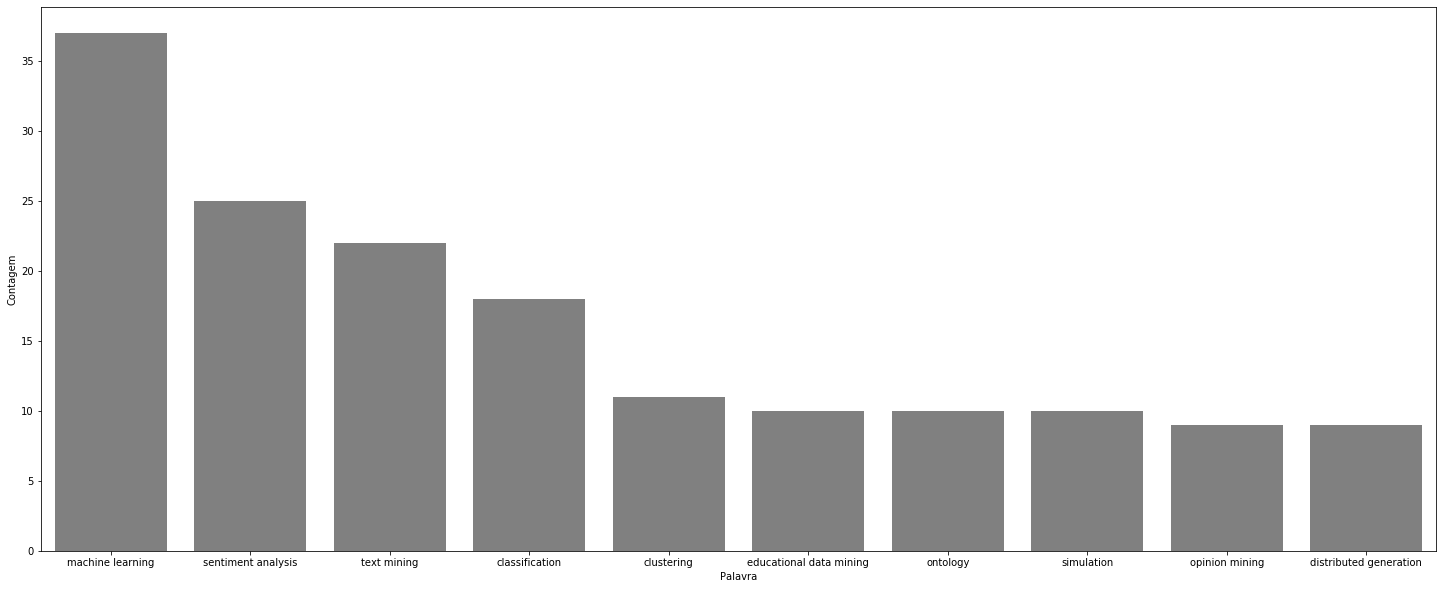

In [24]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento1, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

# Selecionar os Artigos que Pelo Menos um Autor é de Instituição Brasileira

In [25]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
list_geral = list()
sign = -1
result = ""
for afiliacoes in df["Authors with affiliations"]:
    result = ""
    sign = 0
    palavras_texto = token_pontuacao.tokenize(str(afiliacoes))
    for palavra in palavras_texto:
        if(sign == 0):
            if palavra == 'Brazil' or palavra == 'Brasil' or palavra == 'Brazilian':
                result = 'sim'
                sign = 1
            else:
                result = 'nao'
    list_geral.append(result)
                          
df["there are Brazilian authors?"] = list_geral

C:\Users\thayanne.silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
dados_filtered2 = df[df["there are Brazilian authors?"] =='sim']

### Gerando lista de palavras

In [27]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in dados_filtered2["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [28]:
dicionario_frequencia = CountFrequency(list_palavra)

lexicon based dictionary : 1
sentiment analysis : 26
social networks : 8
evaluation : 2
machine learning algorithms : 1
one class classification : 1
outlier detection : 3
predictive models : 3
semi supervised learning : 4
unsupervised learning : 2
influential users detection : 1
classification : 19
machine learning : 39
natural language processing : 8
public transportation : 1
blob detection : 1
development tool : 1
sprite sheet : 1
data mining : 97
microrna : 1
pre mirna ab initio prediction : 1
random forest : 5
smote : 1
artificial neural network : 3
cost sensitive classification : 1
peptide protein identification : 1
phosphoproteomics : 1
shotgun proteomics : 1
bacterial genome : 1
bioinformatics : 2
genome assembly : 1
genome finishing : 1
ion torrent pgm : 1
web tool : 1
building material consumption : 1
electrical systems : 1
estimation : 1
feature selection : 8
information extraction : 6
intelligent systems : 3
big time series data : 1
deep learning : 10
graphics processing uni

sonic fiction : 1
uncooled : 1
infrared : 1
detector : 1
bolometer : 1
investment analysis : 1
brazilian interconnected system : 1
wind power : 2
dominant strategies : 1
power purchase agreement : 1
agentgeo : 1
agents mining : 1
mining images : 1
selective harmonic elimination : 1
mlc2 : 1
5 level mlc2 : 1
7 level mlc2 : 1
npc : 1
multilevel converter : 1
bess : 1
distributed power generation : 1
photovoltaic systems : 2
power system simulation : 1
distribution system : 2
opendss : 1
solar photovoltaic generation : 1
free electricity market : 1
price : 1
value added : 1
space manipulator : 1
dynamic model of robots : 1
robots control : 1
uav : 2
quadcopter : 1
pid control : 1
prototype : 1
dolphinslam : 1
continuous attractor network : 1
underwater slam : 1
path planning : 2
potential fields : 1
obstacles avoidance : 1
mobile robots : 1
kinematic control : 4
recursive robust regulator : 1
markov jump : 1
robot formation : 1
wheeled mobile robots : 1
fault tolerance : 2
collision risk 

poisson noise : 1
variance stabilization : 1
airport : 1
air traffic flow management : 1
collaborative decision making : 1
intelligent system : 3
satisficing game theory : 1
elastic optical networks : 2
power efficiency : 2
hitless rate switching : 2
software defined networking : 1
programming languages : 1
northbound interface : 1
language classification : 1
laser noise : 1
optical signal processing : 1
phase estimation : 2
phase noise : 1
semiconductor lasers : 1
chemical doping : 2
critical current density : 2
pinning mechanisms : 2
single crystals : 1
yba2 xsrxcu3o7 – 8 : 1
single crystals and $\ text yba 2 x }\ text sr {{ x }}\ text cu 3 }\ text o 7 -\ delta }$ : 1
consensus analysis : 2
timevarying delay : 1
switching topology : 2
linear dynamics : 2
time varying delay : 1
image compression : 2
cmos imagers : 2
focal plane : 2
vector quantization : 1
vector quantization vq : 1
auto power spectral density : 1
cross power spectral density : 2
neutron noise technique : 2
reactor ins

In [29]:
df_frequencia_tratamento2 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento2 = df_frequencia_tratamento2.nlargest(columns = "Frequência", n = 11)
df_frequencia_tratamento2 = df_frequencia_tratamento2.iloc[1:]
df_frequencia_tratamento2

,Palavra,Frequência
12,machine learning,39
1,sentiment analysis,26
63,text mining,22
11,classification,19
182,clustering,16
121,ontology,13
41,deep learning,10
72,educational data mining,10
90,time series,10
1033,simulation,10


### Pattern evaluation

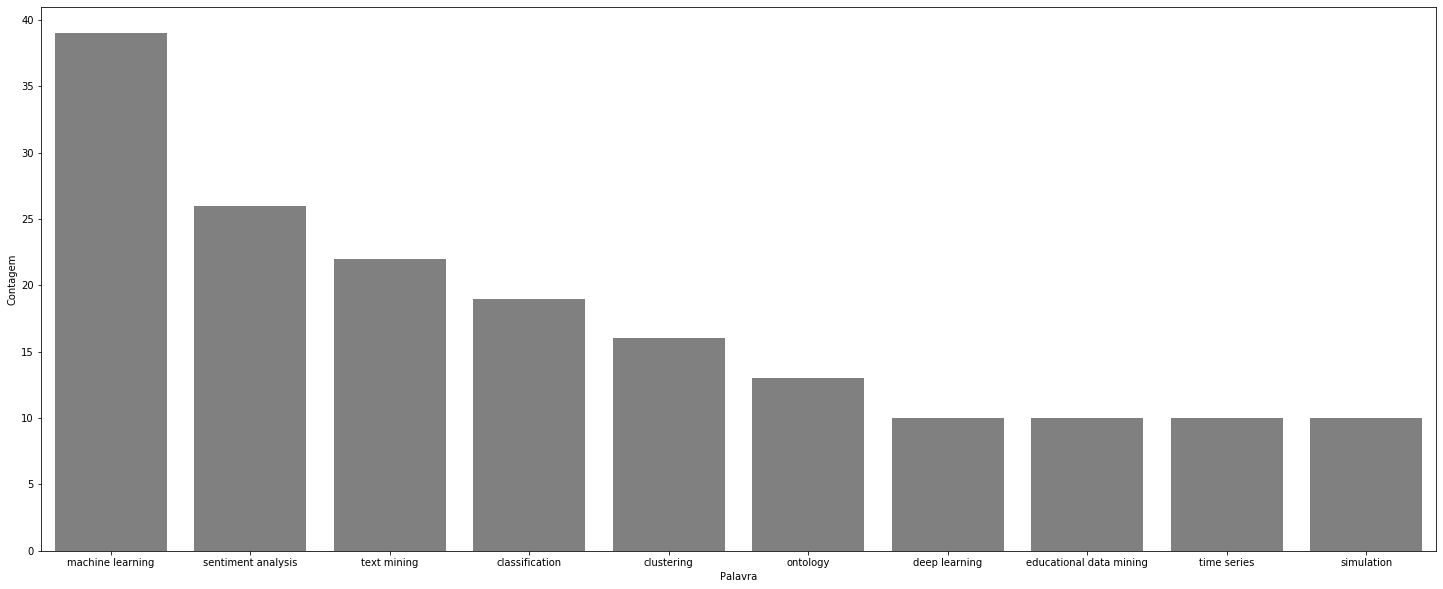

In [30]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento2, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

# Selecionando todos os artigos do dataset

In [31]:
frase_processada = list()
for opiniao in df["Author Keywords"]:
    nova_frase = list()
    opiniao = str(opiniao).lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento1"] = frase_processada
df

C:\Users\thayanne.silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Authors,Title,Year,DOI,Link,Authors with affiliations,Abstract,Author Keywords,Publisher,Tratamento1,Tratamento2,first author country,there are Brazilian authors?
0,"Yan Y., Sheng G., Liu Y., Du X., Wang H., Jian...",Anomalous state detection of power transformer...,2016,10.13336/j.1003-6520.hve.20161128041,https://www.scopus.com/inward/record.uri?eid=2...,"Yan, Y., Department of Electrical Engineering,...",The online monitoring of power transformer is ...,Anomalous state detection; K-means clustering ...,Science Press,anomalous state detection ; k - means clusteri...,anomalous state detection ; k means clustering...,China,nao
1,"Vinod Kumar L., Natarajan S., Keerthana S., Ch...",Credit Risk Analysis in Peer-to-Peer Lending S...,2016,10.1109/ICKEA.2016.7803017,https://www.scopus.com/inward/record.uri?eid=2...,"Vinod Kumar, L., CISCO Systems, Bangalore, Ind...",This research paper aims to analyze the credit...,credit risk analysis; data mining for banking;...,Institute of Electrical and Electronics Engine...,credit risk analysis ; data mining for banking...,credit risk analysis ; data mining for banking...,India,nao
2,"Pablo E., Jung K.",Knowledge extraction through etymological netw...,2016,10.1109/ICKEA.2016.7803019,https://www.scopus.com/inward/record.uri?eid=2...,"Pablo, E., Seoul National University, South Ko...",Extracting knowledge from a text is a very act...,Chinese characters; edge classification; graph...,Institute of Electrical and Electronics Engine...,chinese characters ; edge classification ; gra...,chinese characters ; edge classification ; gra...,Korea,nao
3,"Kawamoto Y., Nishiyama Y., Kobayashi A., Sakaj...",Investigation and construction of dictionary f...,2016,10.1109/ICAICTA.2016.7803102,https://www.scopus.com/inward/record.uri?eid=2...,"Kawamoto, Y., Department of Computer Science a...",Communication via comments is carried out acti...,Morphological analysis; Text mining; Video sha...,Institute of Electrical and Electronics Engine...,morphological analysis ; text mining ; video s...,morphological analysis ; text mining ; video s...,Japan,nao
4,"Suwanwiwat R., Kamonsantiroj S., Pipanmaekapor...",Mining inter-transaction recurring patterns in...,2016,10.1109/ICKEA.2016.7802986,https://www.scopus.com/inward/record.uri?eid=2...,"Suwanwiwat, R., Department of Computer and Inf...",Mining recurring patterns plays an important r...,data mining; periodic pattern mining; recurrin...,Institute of Electrical and Electronics Engine...,data mining ; periodic pattern mining ; recurr...,data mining ; periodic pattern mining ; recurr...,Thailand,nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,A. O. de Sá; L. F. R. d. C. Carmo; R. C. S. Ma...,Covert Attacks in Cyber-Physical Control Systems,2017,10.1109/TII.2017.2676005,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"Admiral Wandenkolk Instruction Center, Brazili...",The advantages of using communication networks...,Cyber-physical systems;networked control syste...,IEEE,cyber - physical systems ; networked control s...,cyber physical systems ; networked control sys...,Brazil,sim
56,I. Moreira; C. Pimentel,Iterative decoding of finite-state Markov chan...,2017,10.1109/IEMCON.2017.8117130,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"Brazilian Telecommunications Agency, Brasilia-...",This paper presents a non-binary finite-stat M...,Bit error rate;finite-stat Markov channels;LDP...,IEEE,bit error rate ; finite - stat markov channels...,bit error rate ; finite stat markov channels ;...,Brazil,sim
57,A. M. Leite da Silva; J. G. d. C. Costa; L. H....,Transmission network cost allocation via nodal...,2017,10.1109/PTC.2017.7981178,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Pontifical Catholic University of Rio de Janei...,This paper presents a new methodology for allo...,Energy market;nodal methodology;tariff zones;t...,IEEE,energy market ; nodal methodology ; tariff zon...,energy market ; nodal methodology ; tariff zon...,Brazil,sim
58,A. L. Xavier;

In [32]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in df["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [33]:
dicionario_frequencia = CountFrequency(list_palavra)

anomalous state detection : 1
k means clustering method : 1
multi dimensional data : 3
online monitoring : 3
sliding windows : 2
credit risk analysis : 1
data mining for banking : 1
ensemble classification : 3
machine learning applications : 1
chinese characters : 1
edge classification : 1
graph mining : 24
korean language : 1
morphological analysis : 1
text mining : 225
video sharing site : 1
web mining : 36
data mining : 1490
periodic pattern mining : 1
recurring pattern : 1
time series : 49
cloud computing : 57
intelligent information application : 1
mapreduce : 52
scheduler : 2
task allocation : 2
online comments : 1
reviews ranking : 1
sentence representation : 1
summary extraction : 1
customer queuing systems : 1
time series forecasting analysis : 1
waiting time prediction : 1
knowledge based models : 2
knowledge engineering : 4
lifelong machine learning : 1
topic modeling : 35
android system : 1
evaluation model : 1
index evaluation : 1
text ming : 1
user experience : 2
aspect a

chaikin money flow indicator : 1
moving average : 1
relative strength index : 1
stochastic momentum index : 1
typical price : 1
document classification : 4
fuzzy set qualifiers and hedges : 1
methodologies : 1
review : 7
block mining : 1
clustering data : 1
id3 decision tree : 2
ppdm : 2
preserving privacy : 1
reconstruction : 1
crm customer relationship management ); data mining : 1
intrusion detection systems : 4
intrusion hindrance systems : 1
network address translation : 2
intrusion bar systems : 1
pamm : 1
air pollution monitoring : 2
air quality mining : 1
de embedding : 1
embedding : 3
error rate : 1
multimedia content : 1
steganography : 3
information search and retrieval : 3
knowledge retrieval : 1
gene ontology : 3
information content : 3
weighted association rules : 2
challenges : 3
kpi : 1
multiclass classification : 5
external clusters : 1
internal clusters : 1
lof : 2
mdcop : 1
minority subset : 1
sve : 1
data stores : 1
novel storage layer : 1
range merge method : 1
ran

reservoir simulation : 1
news analysis : 3
pdpa : 1
arabic : 4
normalization : 2
stemming : 5
multi cloud application : 1
security sla generation : 1
sla checking : 1
ble : 2
ioe : 1
iot : 11
nfc : 1
vlc : 1
blueprint data analysis portal : 1
blueprint epigenomes : 1
cyber infrastructure : 1
epigenomic data mining tools : 1
epigenomic data visualization : 1
epigenomics : 1
hematopoiesis : 1
international human epigenomes consortium : 1
leukemia : 2
multiple instance learning : 2
college forum corpus : 1
network public opinion : 2
budget data : 1
fiscal data : 1
linked open data : 4
e government : 4
participatory design : 1
urban acupuncture : 1
learning management system : 3
predictive indicator : 1
mlp : 4
pso : 5
rbf : 4
privacy preserving : 14
mining algorithms : 2
pattern discovery : 6
data mining concepts : 1
file encryption and decryption : 1
parallel plot : 1
ranked feature ordering : 1
visual representations : 1
base station : 1
computational intelligence and data mining : 1
op

rule exhaustion : 1
assessment of classification quality : 1
unsupervised classification : 1
hydrogen storage : 1
patent analysis : 5
science and technology indicators : 1
technological forecasting : 1
injury accident : 1
physical activity : 1
risk type : 1
disaster informatics : 1
human mobility : 4
advection dispersion equation : 1
pollution propagation : 1
sudden pollution : 1
domain driven data mining : 1
minimum transaction lots : 1
stock portfolio optimization : 1
cpstree : 1
frequent itemsets : 14
gtree cantree : 1
real time data mining : 1
software analytics : 3
software engineering : 7
see06 architectural design : 1
poetries of the tang dynasty and song dynasty : 1
cryptographic algorithm identification : 1
machine intelligence : 1
information embedding cost : 1
sax : 2
environmental magnetism : 1
europe : 1
statistical methods : 2
phishing websites : 1
acetyl xylan esterase : 1
carbohydrate active enzymes : 1
carbohydrate esterases : 1
metagenomics : 1
class noise : 2
evoluti

fall detection : 4
smart home integration : 1
wearable : 2
smart transport : 2
activity prediction : 1
smart environment : 1
lexicon pooling : 1
academic performance : 6
data mining dm ); data mining techniques : 1
edm tools : 1
educational data mining edm ); learning styles : 1
models : 3
teaching : 2
data mining algorithms : 5
fuzzy kmeans : 2
hadoop cluster : 2
kmeans : 3
data classification : 4
examination result analysis : 1
higher secondary directorate : 1
naïve bayes theorem : 1
naive bayes '; predicting student performance : 1
rural area management : 1
k nearest neighbour : 2
library resources classification : 1
pu learning : 1
recommender agent : 1
book recommendation system : 1
content based filtering : 4
ecc algorithm : 1
image steganography : 1
secured data transmission : 1
sudoku puzzle : 1
video steganography : 1
hybrid technique : 1
neuro fuzzy : 2
ahe adaptive histogram equalization ); dog difference of gaussian ); feature : 1
he histogram equalization ); pca principle 

organisational performance : 1
frequent patterns : 4
error diagnostics : 1
image patterns : 1
machine teaching : 1
acute kidney injury : 2
aki networks : 1
aki pathways : 1
cd44 ectodomain : 1
frequently co expressed genes : 1
gene signature : 1
havcr1 : 1
immunoproteasome : 1
kidney co expression modules : 1
kim 1 : 1
toxicogenomics : 2
hardgrove grindability index : 1
petrography : 1
proximate analysis : 1
ultimate analysis : 1
biogeochemical model : 1
cropland carbon fluxes : 1
mid continent intensive campaign : 1
crop stage : 1
helicoverpa armigera : 1
shannon information theory : 1
graph regularization : 1
robust : 1
emulation : 2
root cause analysis : 3
troubleshooting : 1
incremental data : 1
iterative computation : 1
dynamic data : 1
streaming data mining : 1
dea : 2
efficient evaluation : 1
customer review : 3
vector feedback : 1
wearable technology : 1
contextual polarity : 1
decision tree methods : 1
log regression : 1
naive bayes algorithm : 3
identification results : 1
pro

injury severity : 1
traffic crashes : 1
fermi surface : 1
quantum criticality : 1
topology : 1
unconventional superconductivity : 1
tweet classification : 2
vaccines : 1
gst : 1
bio inspired swarm algorithm : 1
chaotic chicken swarm : 1
chaotic maps : 1
optimized supervised feature selection model : 1
wrapper algorithm : 1
human activity recognition har ); matlab : 1
cell lines : 1
cell nomenclature : 1
cell types : 1
analytical learning : 1
knowledge extraction process : 1
lms platforms : 1
consensus : 2
distributed k means : 1
knn ibk ); prediction : 1
computer network security : 3
security threats : 1
click stream : 1
learners behavior analytics : 1
editing distance : 1
tree similarity : 1
co location patterns : 1
extended objects : 1
complex data : 2
meta learning : 6
business intelligence system : 1
geolocated tweet : 1
spatial point data analysis : 1
text data mining : 5
gas turbine : 1
research progress : 1
brand communities : 1
consumer emotions behaviour : 1
online crowd : 1
d

socio political : 1
block diagonal representation : 1
label embedding : 1
robust classification : 1
fusion : 3
multi sensor : 1
vegetation classificaiton : 1
fast moving consumer goods : 1
gaussian processes : 1
cost of action rules : 1
svd : 3
web preferences : 1
website key objects : 1
false positive reduction : 1
user behavior analytics : 2
activation pattern regularization : 1
adaptive multi scale sampling : 1
time sequence : 1
medical healthcare informatics : 1
trace alignment : 1
kalman filter : 1
acquisition process : 1
activity model : 2
teaching support : 1
critical infrastructure : 1
microsoft hololens : 1
spatial hologram : 1
markov decision process : 4
hilbert spaces : 1
inner product : 1
noise : 4
stochastic processes : 2
block krylov subspace method : 1
lanczos golub kahan bidiagonalization : 1
subspace approximation method : 1
hpgdml 17 : 1
invited talk : 1
workshop : 1
attack detection : 1
balancing and frequency control : 1
conformity metric : 1
cyberphysical security 

water resources management : 1
fast forward algorithm : 1
inconsistent neighborhood : 1
neighborhood rough set : 2
test cost : 1
chlamydomonas reinhardtii : 1
dicistronic vector : 1
luciferase : 1
promoter : 1
skipping peptide : 1
terminator : 1
untranslated region : 1
volvox carteri : 1
distributed association rule mining : 1
elliptic curve based paillier cryptosystem : 1
shamir ’ s secret sharing scheme : 1
corporate social responsibility csr ); data mining : 1
financial performance : 1
google trends : 1
japan : 1
high utility patterns : 4
tree based algorithms : 1
cognitive system engineering : 1
human computer interface : 1
model of cognitive mobility : 1
tactile gist : 1
touch stimulating pad : 1
visually impaired people vip : 1
berm breakwater : 1
laboratory experiments : 1
m5 ′ model tree : 1
prediction formula : 1
wave overtopping : 1
design science : 1
enterprise social media : 1
intra organizational blogging platforms : 1
representative information extraction : 1
ride sharing

perspective communities : 1
anti corruption en forcement : 1
bad faith supplier : 1
law violations : 1
public procurements : 1
spending of budgetary funds : 1
criminal networks : 1
algorithm quality comparison : 1
entropy measure : 1
nosocomial infection and clustering : 1
clustering algorithms ensemble : 1
content analisys : 1
k median : 1
at technology workbench : 1
combined knowledge acquisition method : 1
integrated expert systems : 1
problem oriented methodology : 1
alif ailaan : 1
pakistan school datasets : 1
trend prediction : 2
combinatorial optimization : 2
set covering problem : 1
set partitioning problem : 1
algorithm optimization : 1
hadoop framework : 1
quadratic radial basis function neural network : 1
square root progressive quantile variable selection procedure : 1
metabolic profiling : 1
puerarin : 1
uhplc ltq orbitrap mass spectrometer : 1
cross section : 1
page views : 1
e book : 1
data analysis support : 1
tetdm : 1
battery degradation : 1
data mining and data analy

black box attack : 1
substitute model : 1
nucleic acid programmable protein array nappa ); protein array : 1
b cell epitope : 1
bm86 protein : 1
epitope prediction : 1
perturbation theory : 1
proteome mining : 1
extension data mining : 1
transaction deletion : 1
applicability of algorithm : 1
characters of datasets : 1
classification task : 1
building occupancy prediction : 1
data mining approaches : 1
occupancy models : 1
time horizons : 1
web attacks : 1
cltc : 1
dhdds : 1
epileptic encephalopathy : 1
gabbr2 : 1
gabrb2 : 1
ntrk2 : 1
nus1 : 1
rab11 : 1
snap25 : 1
emoticon : 1
emotion lexicon : 1
click behavior : 1
search history : 1
febrile convulsion : 1
vaers : 1
genetic algorithm decision tree : 1
hybrid algorithm : 3
reactants : 1
structure rate constant relationships : 1
ais data : 3
conflict detection : 1
maritime traffic data : 1
navigation collision : 1
internet of things iot ); performance evaluation : 1
radio frequency identification rfid : 1
cloud privacy preserving : 1
res

classification technique : 3
quran : 1
advertisement serving : 1
mimic 2 : 1
icu : 1
p2p network financial platform : 1
contingency : 1
transient : 1
similar : 1
data transformation : 2
automobile insurance : 1
premium rate reform : 1
customer profitability : 1
new customer selection : 1
repayment preditction : 1
openstack : 1
virtual desktop : 1
quality function deployment qfd ); data mining : 1
programming tools : 1
vb net : 1
vb : 1
c : 1
c ++; java : 1
spine : 1
vertebra : 1
euclidean distance function : 1
manhattan distance function : 1
hidden naïve bayes : 1
indirect discrimination : 2
drp algorithm : 1
partitioning : 2
crime : 2
k means method optimization : 1
multilayer perceptron neural network : 1
proxy encryption algorithm : 1
logic programming : 1
data classifying : 1
ontological taxonomy : 1
constraint mining : 1
user in the loop : 1
complex : 1
distributed environment : 1
price : 2
hbase : 2
algarve cup : 1
smart energy city : 1
super very large computers : 1
security and

pattern co occurrence matrix : 1
pattern deploying : 1
discetization methods : 1
keel : 1
bioinformatics and biomedicine : 1
deoxyribonucleic acid dna ); motifs : 1
wind power prediction : 2
neural networks nn ); wind energy : 1
anthropometric measurements : 2
hypertriglyceridemic waist phenotype : 1
predictor : 2
triglycerides : 1
hypertriglyceridemic waist hw phenotype : 1
triglycerides tg ); type 2 diabetes : 1
chronic kidney disease ckd ); support vector machine svm ); decision tree : 1
receiver operating characteristic curve roc ); nearest neighbor algorithm knn ); weka : 1
dclat : 1
eclat : 1
fin : 1
aprioritid : 1
relim : 1
h mine : 1
data representation : 1
resource allocation : 1
multi dimensional fusion : 1
accuracy assessment : 1
multi relational classification : 1
relational database : 2
concept based : 1
instance based : 1
probability based : 1
genetic based : 1
people flow : 1
open education resource : 1
pattern and rule discovery : 1
minimum support : 2
small sized enter

news media case study : 1
industrial alarm management : 1
graphx : 1
degree of dependency : 1
label scarcity : 1
limited labeled data : 1
partially labeled data : 1
monotonicity constraint : 1
maximum continuous sum : 1
comparable corpora : 1
adaptive robust model : 1
nonstationary systems identification : 1
on line mode : 1
encoding : 1
xml queries : 1
individual behavior : 1
gps trajectories : 2
points of interest : 2
periodic frequent mining : 2
exploratory olap : 2
conceptual analytical model : 1
integral olap model : 1
dts : 1
crop yield : 1
business intellingence : 1
personnel administrative : 1
stacked autoencoders : 1
static and dynamic databases : 1
incremental mining strategy : 1
radicalisation : 1
sigmund freud : 1
carl gustav jung : 1
unconscious : 1
document : 1
query workload : 1
content : 1
inverted index : 1
dynamic data management : 1
live data analysis : 1
link mining : 1
core number : 1
video association mining : 1
interactive pattern recognition : 1
medical evidence

aplicações móveis : 1
realidade aumentada : 1
dados abertos : 1
social network governance : 1
security and privacy : 1
internet governance : 1
volunteer work : 1
ngo effectiveness : 1
ngo management : 1
centralized self healing scheme : 2
load shedding : 2
mixed integer nonlinear programming : 2
burned area monitoring : 1
burn sensitive vegetation index : 1
remote sensing ;( v w index system : 1
brazilian electricity sector : 1
damped pegels : 1
standard pegels : 1
rural energization : 1
solar energy : 1
distribution systems : 1
substation : 1
reliability : 4
saidi : 1
eens : 1
geographic information system web : 1
geographies data : 1
entertainment : 1
luziânia : 1
superconducting levitation : 2
maglev vehicle : 2
linear induction motor : 2
statistical learning theory : 1
automatic speech recognition : 1
criminality : 1
light : 1
long distance transmission line : 1
halfwavelength : 1
non conventional transmission line : 1
succession planning : 1
career path : 1
subway railway system :

nontechnical losses : 1
spatial point pattern analysis : 1
multimodality : 1
electronic games : 1
assistive technology : 1
visual impairment : 1
electrical performance : 1
surge arresters housings : 1
high density polyethylene : 1
scrum : 1
power system dynamics : 1
control design : 1
wams : 1
transmission planning : 2
robust optimization : 2
scenario reduction : 1
multilayer perceptron mlp ); object correlation images ocis ); remote sensing : 1
simple linear iterative clustering slic ); superpixel : 1
synthetic aperture radar sar images : 1
dtt : 1
dvb t2 : 1
interference protection ratios : 1
ntsc : 1
aperiodic array : 2
broadband array : 2
planar array : 2
complexity analysis : 2
coherent optical communications : 1
spectrally sliced receiver : 1
nonlinear compensation : 2
index 1 descriptor systems : 1
lyapunov matrix equations : 1
rational krylov subspace method : 1
model reduction : 1
balanced truncation : 1
ac machines : 2
electric machines : 1
magnetic cores : 2
magnetic losses 

In [34]:
df_frequencia_tratamento3 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento3 = df_frequencia_tratamento3.nlargest(columns = "Frequência", n = 11)
df_frequencia_tratamento3 = df_frequencia_tratamento3.iloc[1:]
df_frequencia_tratamento3

,Palavra,Frequência
127,machine learning,334
121,big data,311
278,classification,240
172,clustering,232
55,sentiment analysis,227
14,text mining,225
108,feature selection,128
107,decision tree,123
154,natural language processing,91
110,opinion mining,86


### Pattern evaluation

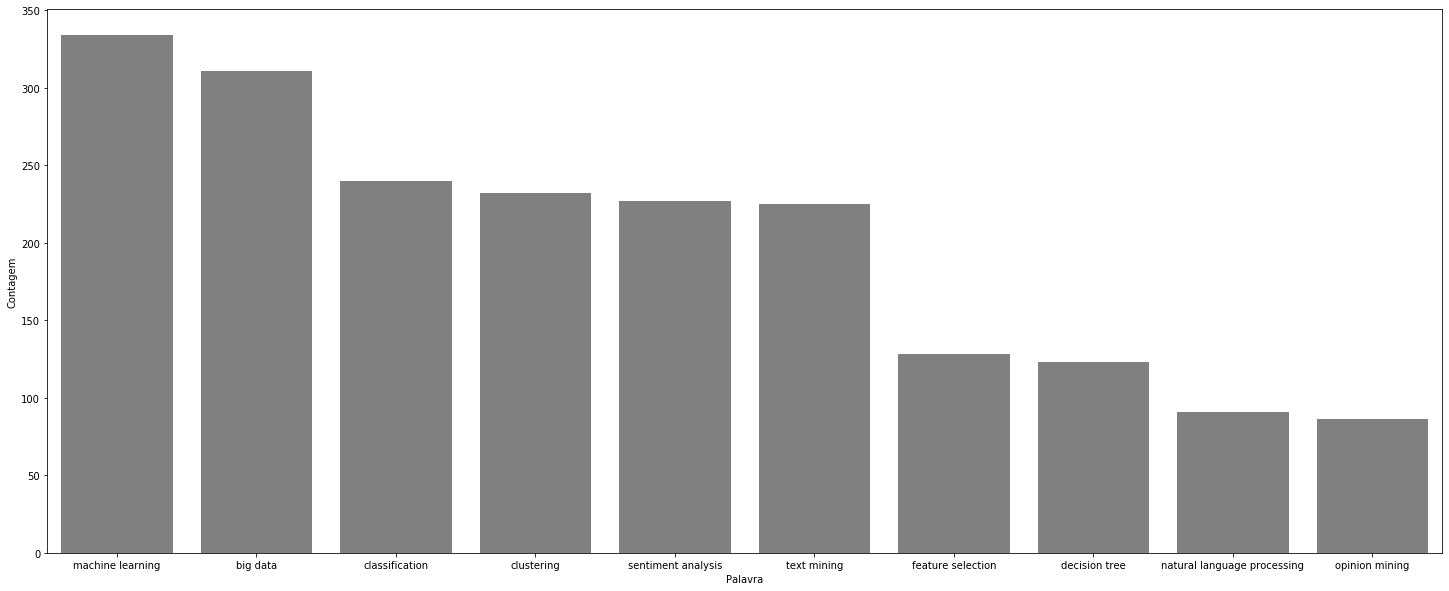

In [35]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento3, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

# Sistema de recomendação de artigos

# Data Mining

In [36]:
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [37]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 1

In [38]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    return forest

In [39]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    result = list()
    i = 0
    while i < len(idx_array):
        result.append((text, idx_array[i], database.iloc[idx_array[i]]['Title']))
        i += 1
    #result = database.iloc[2948]['Title']
    
    return result

In [40]:
df['text'] = df['Title']
forest = get_forest(df, permutations)

C:\Users\thayanne.silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
import numpy as np
top_10_artigos_primeiro_autor_brasileiro = list()
top_10_artigos_com_um_autor_brasileiro = list()
top_10_artigos_geral = list()

for word in df_frequencia_tratamento1["Palavra"]:
    num_recommendations = 10
    result = predict(str(word), df, permutations, num_recommendations, forest)
    top_10_artigos_primeiro_autor_brasileiro.append(result)
    
for word in df_frequencia_tratamento2["Palavra"]:
    num_recommendations = 10
    result = predict(str(word), df, permutations, num_recommendations, forest)
    top_10_artigos_com_um_autor_brasileiro.append(result)
    
for word in df_frequencia_tratamento3["Palavra"]:
    num_recommendations = 10
    result = predict(str(word), df, permutations, num_recommendations, forest)
    top_10_artigos_geral.append(result)
    

In [50]:
i = 1
df_rc_geral = pd.DataFrame(top_10_artigos_primeiro_autor_brasileiro[0],columns=['Palavra', 'indice', 'Artigo Recomendado'])
while i < len(top_10_artigos_primeiro_autor_brasileiro):
    df_rc = pd.DataFrame(top_10_artigos_primeiro_autor_brasileiro[i],columns=['Palavra', 'indice', 'Artigo Recomendado'])
    df_rc_geral = pd.concat([df_rc_geral, df_rc])
    #df_rc_geral = pd.concat(df_rc, ignore_index=True)
    i += 1

In [51]:
df_rc_geral

,Palavra,indice,Artigo Recomendado
0,machine learning,4478,Data mining and machine learning approaches on...
1,machine learning,5765,Machine learning techniques for age at death e...
2,machine learning,4297,Reintroducing KAPD as a Dataset for Machine Le...
3,machine learning,3818,DeMalC: A feature-rich machine learning framew...
4,machine learning,2899,Kernel-driven similarity learning
...,...,...,...
5,distributed generation,1525,Distributed data association rule mining: Tool...
6,distributed generation,6103,JFORTES: Java Formal Unit TESt Generation
7,distributed generation,2905,DIMSpan - Transactional frequent subgraph mini...
8,distributed generation,5114,Multifunction intelligent relay for inverter-b...
